In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
hosp_df = pd.read_csv('../cleandata/all_hospitals.csv')
hosp_df.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [81]:
cen_df = pd.read_csv('../cleandata/census_clean.csv', usecols = ['State/UT', 'Population',])
cen_df.head()

,State/UT,Population
0,Jammu and Kashmir,870354.0
1,Jammu and Kashmir,753745.0
2,Laddakh,133487.0
3,Laddakh,140802.0
4,Jammu and Kashmir,476835.0


In [82]:
cen_state = (cen_df.groupby('State/UT')['Population'].sum()).reset_index()
cen_state.head()

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,84580777.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0


In [83]:
merged = cen_state.merge(hosp_df, on='State/UT', how='right')
merged.tail()

,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
32,Tripura,3673917.0,114,22,12,9,157,4895
33,Uttar Pradesh,199812341.0,3277,671,0,174,4122,58310
34,Uttarakhand,10086292.0,275,69,19,20,383,6660
35,West Bengal,91276115.0,1374,406,70,55,1905,51163
36,All India,NaN,29899,5568,1255,1003,37725,739024


In [84]:
merged.iloc[-1, 1] = merged.iloc[:-1, 1].sum() if pd.isna(merged.iloc[-1, 1]) else merged.iloc[-1, 1]
merged.tail()

,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
32,Tripura,3.673917e+06,114,22,12,9,157,4895
33,Uttar Pradesh,1.998123e+08,3277,671,0,174,4122,58310
34,Uttarakhand,1.008629e+07,275,69,19,20,383,6660
35,West Bengal,9.127612e+07,1374,406,70,55,1905,51163
36,All India,1.150547e+09,29899,5568,1255,1003,37725,739024


In [85]:
merged.isna().sum()
merged = merged.dropna()

In [86]:
merged['Beds_expected'] = ((merged['Population']/1000) * 3).astype(int)
merged.head()

,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Beds_expected
0,Andaman and Nicobar Islands,380581.0,27,4,0,3,34,1246,1141
1,Andhra Pradesh,84580777.0,1417,198,31,20,1666,60799,253742
2,Arunachal Pradesh,1383727.0,122,62,0,15,199,2320,4151
3,Assam,31205576.0,1007,166,14,33,1220,19115,93616
4,Bihar,104099452.0,2007,63,33,43,2146,17796,312298


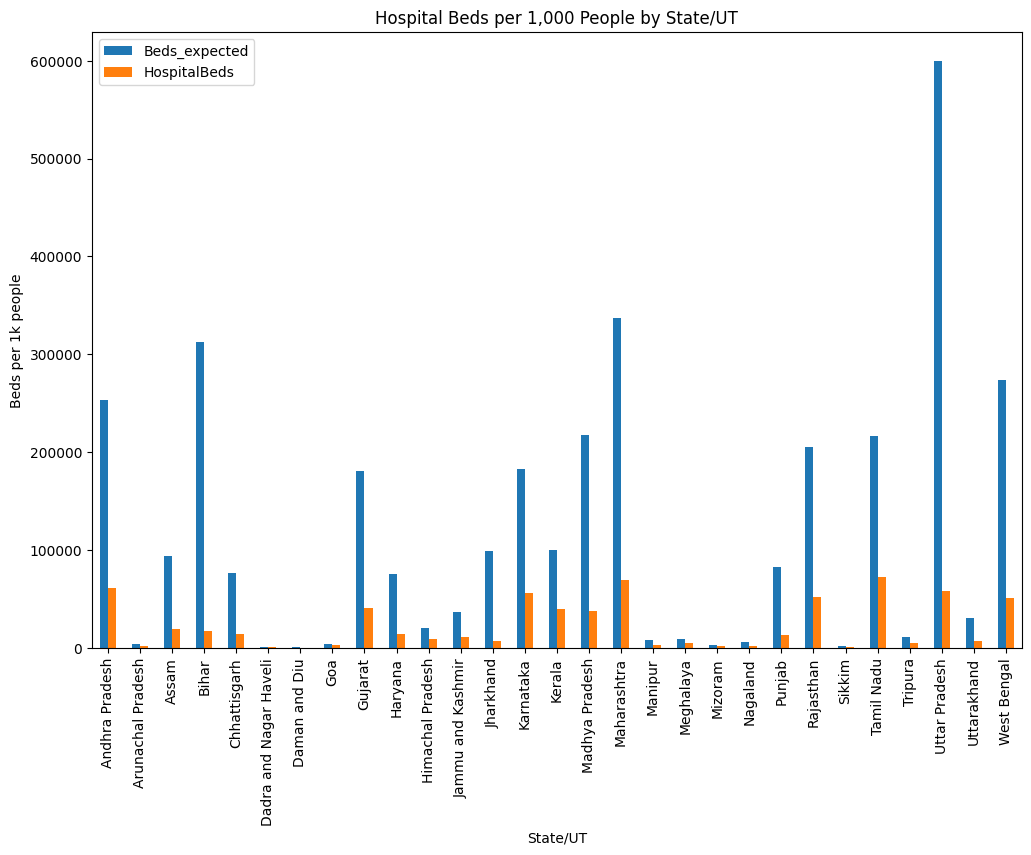

In [87]:
merged_bed_deficit = merged[merged['Beds_expected']-merged['HospitalBeds'] > 0]
ax = merged_bed_deficit.iloc[:-1, :].plot(x='State/UT', y=['Beds_expected', 'HospitalBeds'], kind='bar', figsize=(12,8))

plt.ylabel('Beds per 1k people')
plt.title('Hospital Beds per 1,000 People by State/UT')
plt.show()

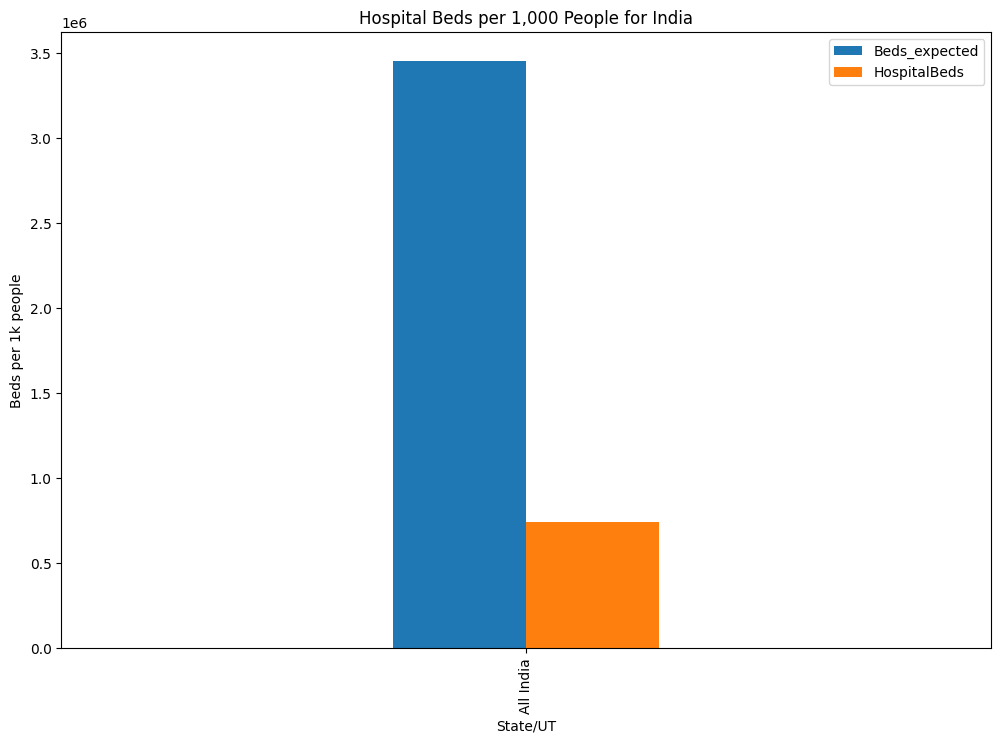

In [94]:
ax = merged_bed_deficit[merged_bed_deficit['State/UT'] == 'All India'].plot(x='State/UT', y=['Beds_expected', 'HospitalBeds'], kind='bar', figsize=(12,8), width=0.2)

plt.ylabel('Beds per 1k people')
plt.title('Hospital Beds per 1,000 People for India')
plt.show()

In [90]:
merged_bed_deficit['Beds_gap'] = merged_bed_deficit['Beds_expected']-merged_bed_deficit['HospitalBeds']
merged_bed_deficit.head()


C:\Users\Miles\AppData\Local\Temp\ipykernel_11976\714469866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_bed_deficit['Beds_gap'] = merged_bed_deficit['Beds_expected']-merged_bed_deficit['HospitalBeds']


,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Beds_expected,Beds_gap
1,Andhra Pradesh,84580777.0,1417,198,31,20,1666,60799,253742,192943
2,Arunachal Pradesh,1383727.0,122,62,0,15,199,2320,4151,1831
3,Assam,31205576.0,1007,166,14,33,1220,19115,93616,74501
4,Bihar,104099452.0,2007,63,33,43,2146,17796,312298,294502
6,Chhattisgarh,25545198.0,813,166,12,32,1023,14354,76635,62281


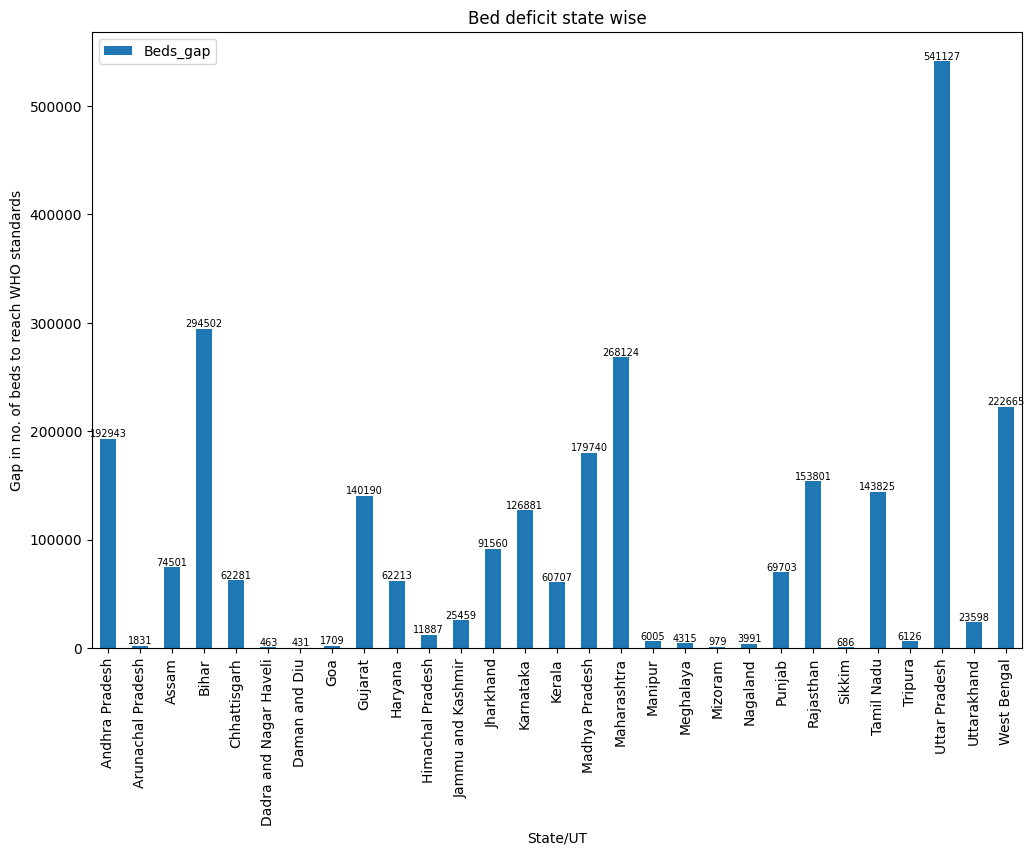

In [107]:
ax = merged_bed_deficit.iloc[:-1, :].plot(x='State/UT', y='Beds_gap', kind='bar', figsize=(12,8))
for i, v in enumerate(merged_bed_deficit.iloc[:-1, :]['Beds_gap']):
    ax.text(i, v+0.5, str(v), ha='center', va='bottom', color='black', fontsize=7)


plt.ylabel('Gap in no. of beds to reach WHO standards')
plt.title('Bed deficit state wise')
plt.show()

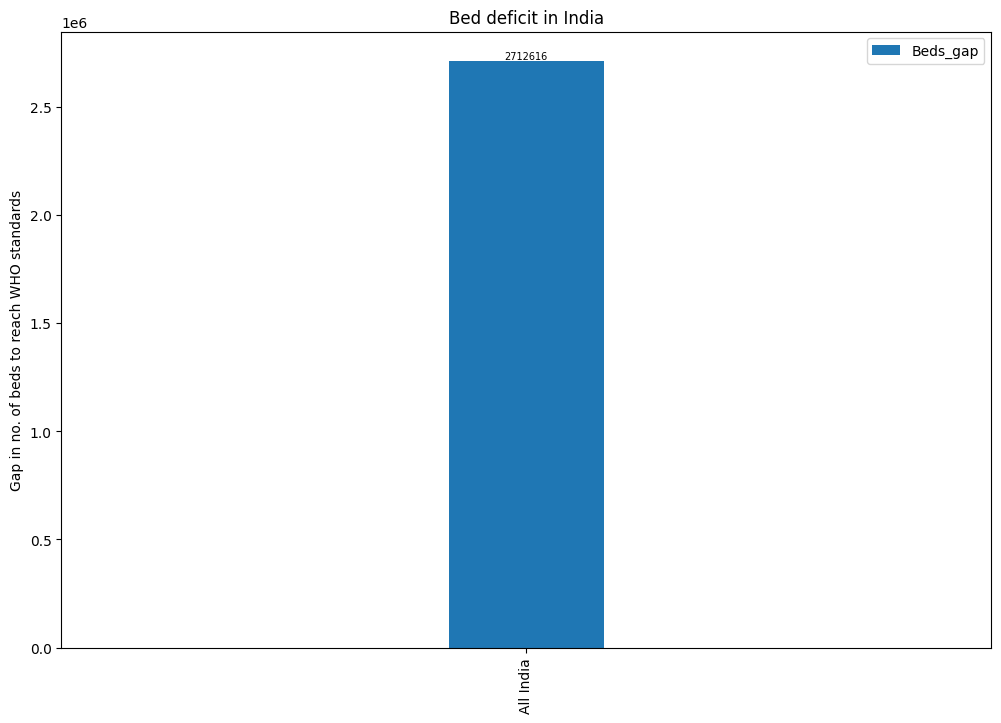

In [114]:
ax = merged_bed_deficit[merged_bed_deficit['State/UT'] == 'All India'].plot(x='State/UT', y='Beds_gap', kind='bar', figsize=(12,8), width=0.1)
for i, v in enumerate(merged_bed_deficit[merged_bed_deficit['State/UT'] == 'All India']['Beds_gap']):
    ax.text(i, v+0.5, str(v), ha='center', va='bottom', color='black', fontsize=7)

plt.xlabel('')
plt.ylabel('Gap in no. of beds to reach WHO standards')
plt.title('Bed deficit in India')
plt.show()